<a href="https://colab.research.google.com/github/samadpls/TensorFlow-Model-Exploration/blob/colab/Reinforcement_Learning_With_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym #openAI Gym

In [2]:
env = gym.make("FrozenLake-v1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
print(env.observation_space.n) # no. of state
print(env.action_space.n) # no. of action

16
4


In [4]:
env.reset()

0

In [5]:
action = env.action_space.sample()
print(action)

3


In [6]:
obs, reward, done, info = env.step(action) # take action , notice and return the info

In [7]:
env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [8]:
import gym
import numpy as np
import time

env = gym.make("FrozenLake-v1")
state = env.observation_space.n
action = env.action_space.n

In [9]:
q = np.zeros((state,action))
q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
episodes = 1500
max_step = 100 # to stop so it not loop infinity

learning_rate = 0.81 # the higher the more it change
gamma = 0.96
render = False
epslion = 0.9 #90% its random and 10% q table to look

In [11]:
if np.random.uniform(0,1) < epslion:
  action = env.action_space.sample()
else:
  action = np.argmax(q[state,:])

In [12]:

rewards = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    for step in range(max_step):
        if np.random.uniform(0, 1) < epslion:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q[state, :])  # Exploit

        next_state, reward, done, _ = env.step(action)

        q[state, action] = q[state, action] + learning_rate * (
            reward + gamma * np.max(q[next_state, :]) - q[state, action]
        )

        total_reward += reward
        state = next_state

        if done:
            break

    rewards.append(total_reward)
    epslion -= 0.001  # Decay epslion over episodes
    env.render()

print("Q-table:")
print(q)
print("Average reward:", np.mean(rewards))

Q-table:
[[1.63828579e-01 5.63621826e-02 5.36345445e-02 4.48399256e-02]
 [2.50144375e-03 9.25773883e-03 7.55550322e-03 2.30902487e-01]
 [1.25499630e-02 9.47781361e-03 1.41083328e-02 1.92391420e-01]
 [3.66469733e-03 1.45796097e-03 5.86009125e-03 8.28594103e-02]
 [2.65739135e-01 1.17949694e-02 1.53838133e-03 1.40587520e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.94823830e-01 1.06428971e-04 8.40528042e-05 7.76106528e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.64002776e-04 3.78596733e-02 2.66789523e-02 4.46317279e-01]
 [1.09282352e-04 7.66708008e-01 2.37528261e-02 1.20926061e-02]
 [2.49358465e-01 6.25795345e-03 4.99988764e-03 2.60177145e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.10536130e-01 1.32681767e-01 9.33456682e-01 6.29045752e-02]
 [1.45216551e-01 9.97986871e-01 1.69857201e-01 1.59120863e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


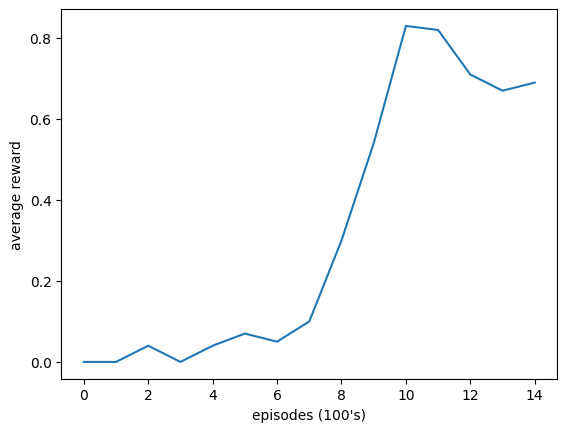

In [18]:
import matplotlib.pyplot as plt
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()